# Named Entity Recognition
Named entities are available as the ents property of a Doc

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')                   # This function call loads a pre-trained language model
doc = nlp("Recently, the Wikimedia Foundation, which operates the online encyclopedia Wikipedia, appointed social entrepreneur Maryana Iskander as its chief executive officer. The non-profit that operates Wikipedia, one of the world's most popular websites, has a new CEO, Maryana Iskander. ")                                   # An argument to find entity.
for ent in doc.ents:
    print(ent.text,"|",ent.start_char,"|",ent.end_char,"|",ent.label_)        # label_ = type


the Wikimedia Foundation | 10 | 34 | ORG
Wikipedia | 75 | 84 | GPE
Maryana Iskander | 116 | 132 | PERSON
Wikipedia | 194 | 203 | GPE
one | 205 | 208 | CARDINAL
Maryana Iskander | 262 | 278 | PERSON


# Components offered by Spacy in NLP pipe

In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

# Accessing entity annotations and labels

In [ ]:
ent_i = [doc[0].text, doc[0].ent_iob_, doc[0].ent_type_]
ent_am = [doc[1].text, doc[1].ent_iob_, doc[1].ent_type_]
ent_so = [doc[2].text, doc[2].ent_iob_, doc[2].ent_type_]         # If B means beginning of entity and O means outside an entity
print(ent_i)
print(ent_am)
print(ent_so)

['Recently', 'O', '']
[',', 'O', '']
['the', 'B', 'ORG']


# Visualizing named entities

In [ ]:
from spacy import displacy
displacy.render(doc, style="ent")

In [ ]:
displacy.render(doc)                # style dep refers to dependency visualizer

#

In [ ]:
nlp.pipe_labels['ner']                         # supports how many entities

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [ ]:
# span is class in spacy
from spacy.tokens import Span
s1 = Span(doc, 0, 1, label="ORG")
s2 = Span(doc, 5, 6, label="ORG")

d=doc.set_ents([s1, s2], default="unmodified")
d=doc.ents

In [ ]:
for ent in d:
  print(ent.text,' | ',ent.label_)

Recently  |  ORG
the Wikimedia Foundation  |  ORG
,  |  ORG
Wikipedia  |  GPE
Maryana Iskander  |  PERSON
Wikipedia  |  GPE
one  |  CARDINAL
Maryana Iskander  |  PERSON


# Morphology

In [ ]:
print(doc[2].morph)

Definite=Def|PronType=Art


# 1. Project Overview and Import Modules

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 2. NER Dataset

In [ ]:
data = pd.read_csv("ner_dataset.csv",encoding="ISO-8859-1",on_bad_lines='skip')
data.shape

(1048575, 4)

In [ ]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [ ]:
# Checking data types
data.dtypes

,0
Sentence #,object
Word,object
POS,object
Tag,object


In [ ]:
# checking null values
data.isnull().sum()

,0
Sentence #,1000616
Word,10
POS,0
Tag,0


In [ ]:
# imputing null values
data=data.ffill()


In [ ]:
data.isna().sum()

,0
Sentence #,0
Word,0
POS,0
Tag,0


In [ ]:
data.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [ ]:
# Checking Unique values in dataset
print("Unique words in corpus: ",data.Word.nunique())
print("Unique tags in corpus: ",data.Tag.nunique())

Unique words in corpus:  35177
Unique tags in corpus:  17


In [ ]:
words=list(set(data["Word"].values))
words.append("ENDPAD")
n_words=len(words)

In [ ]:
tags=list(set(data["Tag"].values))
n_tags=len(tags)

In [ ]:
# length of words and tags
n_words,n_tags

(35178, 17)

# 3. Retrieve Sentences and tags

In [ ]:
class sent(object):
  def __init__(self, data):
    self.n_sent = 1
    self.data = data
    self.empty = False
    a = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),s["POS"].values.tolist(),s["Tag"].values.tolist())]
    self.grouped = self.data.groupby("Sentence #").apply(a)
    self.sentences = [s for s in self.grouped]

  def get_next(self):
      try:
          s = self.grouped["Sentence: {}".format(self.n_sent)]
          self.n_sent += 1
          return s
      except:
          return None

In [ ]:
g = sent(data)
sentences = g.sentences

In [ ]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

# 4. Mapping b/w sentences and tags

In [ ]:
wo={w:i+1 for i,w in enumerate(words)}
ta={t:i for i,t in enumerate(tags)}

In [ ]:
wo

{'enroll': 1,
 'compensating': 2,
 'fourth-seed': 3,
 'Manta': 4,
 'mansion': 5,
 'Wasserhoevel': 6,
 'Levan': 7,
 'al-Shara': 8,
 'mummified': 9,
 'rang': 10,
 'possibility': 11,
 '70.2': 12,
 'causeway': 13,
 '17,765': 14,
 'Loftis': 15,
 're-write': 16,
 'Mashjid': 17,
 'bell': 18,
 'al-Damaluji': 19,
 'Inadequate': 20,
 'sporting': 21,
 'Angolan': 22,
 'rocket-powered': 23,
 'issue': 24,
 'almost-daily': 25,
 'upheld': 26,
 'focusing': 27,
 'foreclosure': 28,
 'constrained': 29,
 'outrage': 30,
 'prohibits': 31,
 'Macedonians': 32,
 'Johns': 33,
 'Nhlanhla': 34,
 'California': 35,
 'sounds': 36,
 'reproaches': 37,
 'presiding': 38,
 'sideways': 39,
 'Cases': 40,
 'Pokhara': 41,
 'conserving': 42,
 'skip': 43,
 'Marcus': 44,
 'Restore': 45,
 'holds': 46,
 'Publications': 47,
 '25-meter-long': 48,
 'were': 49,
 'singled': 50,
 'lawmakes': 51,
 'hint': 52,
 'options': 53,
 'Leonel': 54,
 'Srebotnik': 55,
 'Lammert': 56,
 'Issori': 57,
 'Coup': 58,
 'Tributes': 59,
 'Secondhand': 60,
 

# 5. Padding input sentences

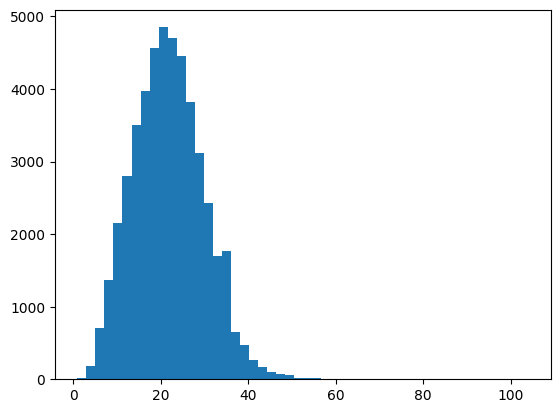

In [ ]:
plt.hist([len(s) for s in sentences],bins=50)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = [[wo[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=n_words-1)

y = [[ta[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=ta["O"])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. LSTM(Long short term Memory) Model

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [ ]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=n_words, output_dim=50, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 50, 50)              │       1,758,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 50, 200)             │         120,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 50, 17)              │           3,417 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,883,117 (7.18 MB)

 Trainable params: 1,883,117 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# 7. Training

In [ ]:
!pip install livelossplot

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

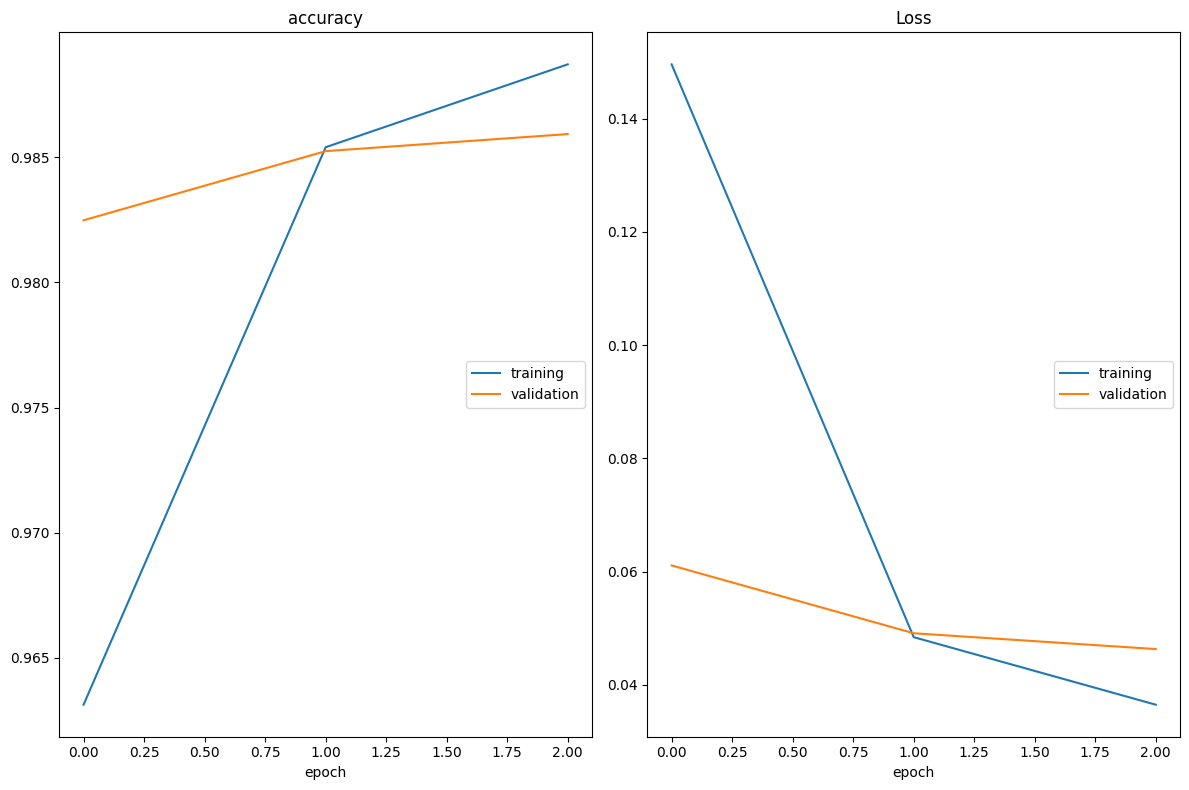

accuracy
	training         	 (min:    0.963, max:    0.989, cur:    0.989)
	validation       	 (min:    0.982, max:    0.986, cur:    0.986)
Loss
	training         	 (min:    0.036, max:    0.150, cur:    0.036)
	validation       	 (min:    0.046, max:    0.061, cur:    0.046)

Epoch 3: val_loss improved from 0.04910 to 0.04631, saving model to model_weights.weights.h5
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 202s 121ms/step - accuracy: 0.9888 - loss: 0.0363 - val_accuracy: 0.9859 - val_loss: 0.0463


In [ ]:
chkpt = ModelCheckpoint("model_weights.weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)
callbacks = [PlotLossesCallback(), chkpt, early_stopping]
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    batch_size=32,
    epochs=3,
    callbacks=callbacks,
    verbose=1
)

# 8. Evaluation

In [ ]:
model.evaluate(x_test, y_test)

300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9856 - loss: 0.0472


[0.046308815479278564, 0.9859301447868347]

In [ ]:
i = np.random.randint(0, x_test.shape[0]) #659
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Word           True 	 Pred

------------------------------
Authorities    O	O
said           O	O
the            O	O
governor       O	O
of             O	O
eastern        O	O
Lagham         B-geo	O
province       O	O
was            O	O
unhurt         O	O
in             O	O
the            O	O
attack         O	O
Saturday       B-tim	B-tim
.              O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O
Windhoek       O	O


# 9. CNN (Convolution neural network)

In [ ]:
from keras.utils import to_categorical
NUM_CLASSES = len(ta)
y = to_categorical(y, num_classes=NUM_CLASSES)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential,Input
from tensorflow.keras.layers import Embedding, Bidirectional,LSTM, TimeDistributed,Dense,Conv1D, MaxPooling1D

model1 = Sequential()
model1.add(Embedding(input_dim=len(wo)+1, output_dim=50))
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model1.add(TimeDistributed(Dense(n_tags, activation="softmax")))

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = model1.fit(X_train, Y_train, batch_size=32, epochs=3, validation_data=(X_test,Y_test))

Epoch 1/3
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 45s 33ms/step - accuracy: 0.9484 - loss: 0.3521 - val_accuracy: 0.9838 - val_loss: 0.0550
Epoch 2/3
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.9870 - loss: 0.0432 - val_accuracy: 0.9851 - val_loss: 0.0494
Epoch 3/3
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9894 - loss: 0.0331 - val_accuracy: 0.9851 - val_loss: 0.0492


In [ ]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 50, 50)              │       1,758,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 50, 64)              │           9,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 50, 17)              │           1,105 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,769,719 (6.75 MB)

 Trainable params: 1,769,719 (6.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
score = model1.evaluate(X_test, np.array(Y_test))
print(f"Test Accuracy: {score[1]}")

300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9851 - loss: 0.0497
Test Accuracy: 0.9851334691047668


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn import linear_model

def get_tag_and_training_data(df):
    '''takes a Pandas DataFrame and returns tokenized sentences and document tags as separate lists'''
    tags=[]
    documents=[]
    for index, row in df.iterrows():
        if isinstance(row['Sentence #'], str):
            tags.append(int(row['Sentence #'].split(' ')[1]))
        else:
            print(f"Warning: Non-string value encountered in 'Sentence #': {row['Sentence #']}")
            tags.append(-1)
        documents.append(row['Word'])
    return tags,documents

train_tags,train_documents=get_tag_and_training_data(data)
test_tags,test_documents=get_tag_and_training_data(data)

